In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust


import seaborn as sns
import matplotlib.pylab as plt

In [8]:
data = pd.read_csv("/content/pit_stops.csv")
driver_df = pd.read_csv("/content/drivers.csv")
races_df = pd.read_csv("/content/races.csv")
merge_driver = pd.merge(data,driver_df,on="driverId")
merge_races = pd.merge(data,races_df,on="raceId")
constr_stand = pd.read_csv("/content/constructor_standings.csv")
constr_res = pd.read_csv("/content/constructor_results.csv")
constr= pd.read_csv("/content/constructors.csv")
merge_constr = pd.merge(constr,constr_stand,on='constructorId')
merge_driver.head(10)

,raceId,driverId,stop,lap,time,duration,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url
0,841,153,1,1,17:05:23,26.898,26898,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
1,841,153,2,17,17:31:06,24.463,24463,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
2,841,153,3,35,17:59:45,26.348,26348,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
3,842,153,1,16,16:32:25,23.584,23584,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
4,842,153,2,32,17:00:55,22.888,22888,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
5,843,153,1,9,15:19:36,22.419,22419,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
6,844,153,1,13,15:24:25,22.713,22713,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
7,844,153,2,29,15:49:46,21.826,21826,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
8,844,153,3,39,16:05:31,21.986,21986,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari
9,844,153,4,55,16:30:31,21.931,21931,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari


In [9]:
pit_stop_df = pd.read_csv("/content/pit_stops.csv")
mean_pit = print(pit_stop_df['milliseconds'].mean())

85532.63106441297


In [ ]:
print(trim_mean(pit_stop_df['milliseconds'], 0.1))

24274.938563434967


In [ ]:
print(pit_stop_df['milliseconds'].median())


23601.0


In [ ]:
print(data['lap'].mean())

25.291365920511648


In [ ]:
print(np.average(data['lap'], weights=data['milliseconds']))

21.417204563638727


In [ ]:
print(data.head(12))

    raceId  driverId  stop  lap      time duration  milliseconds
0      841       153     1    1  17:05:23   26.898         26898
1      841        30     1    1  17:05:52   25.021         25021
2      841        17     1   11  17:20:48   23.426         23426
3      841         4     1   12  17:22:34   23.251         23251
4      841        13     1   13  17:24:10   23.842         23842
5      841        22     1   13  17:24:29   23.643         23643
6      841        20     1   14  17:25:17   22.603         22603
7      841       814     1   14  17:26:03   24.863         24863
8      841       816     1   14  17:26:50   25.259         25259
9      841        67     1   15  17:27:34   25.342         25342
10     841         2     1   15  17:27:41   22.994         22994
11     841         1     1   16  17:28:24   23.227         23227


In [ ]:
print(data['milliseconds'].std())

312108.764449306


In [ ]:
print(data['milliseconds'].quantile(0.75) - data['milliseconds'].quantile(0.25))

4458.0


In [32]:
print(robust.scale.mad(data['milliseconds']))
print(abs(data['milliseconds'] - data['milliseconds'].mean()).median() / 0.6744897501960817)

2874.7657016823623
92291.44111725391


In [ ]:
print(data['lap'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05     2.0
0.25    13.0
0.50    25.0
0.75    36.0
0.95    51.0
Name: lap, dtype: float64


In [ ]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(data['lap'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

     5.0%  25.0%  50.0%  75.0%  95.0%
lap   2.0   13.0   25.0   36.0   51.0


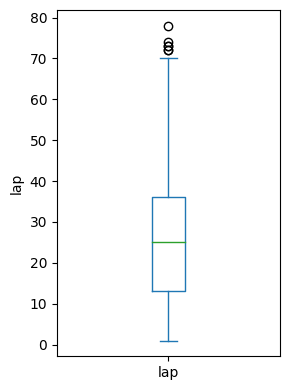

In [ ]:
ax = (data['lap']/1).plot.box(figsize=(3, 4))
ax.set_ylabel('lap')

plt.tight_layout()
plt.show()

In [ ]:
binnedMilliseconds = pd.cut(merge_driver['milliseconds'], 10)
print(binnedMilliseconds.value_counts())

milliseconds
(9840.88, 318509.0]       10483
(929733.0, 1235345.0]       162
(1235345.0, 1540957.0]      114
(1846569.0, 2152181.0]       63
(1540957.0, 1846569.0]       31
(2152181.0, 2457793.0]       31
(624121.0, 929733.0]         23
(318509.0, 624121.0]         18
(2763405.0, 3069017.0]       17
(2457793.0, 2763405.0]        3
Name: count, dtype: int64


In [ ]:
binnedMilliseconds.name = 'binnedMilliseconds'
df = pd.concat([merge_driver, binnedMilliseconds], axis=1)
df = df.sort_values(by='milliseconds')

groups = []
for group, subset in df.groupby(by='binnedMilliseconds'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'Drivers pitted': ','.join(subset.code)
    })
print(pd.DataFrame(groups))

                 BinRange  Count  \
0     (9840.88, 318509.0]  10483   
1    (318509.0, 624121.0]     18   
2    (624121.0, 929733.0]     23   
3   (929733.0, 1235345.0]    162   
4  (1235345.0, 1540957.0]    114   
5  (1540957.0, 1846569.0]     31   
6  (1846569.0, 2152181.0]     63   
7  (2152181.0, 2457793.0]     31   
8  (2457793.0, 2763405.0]      3   
9  (2763405.0, 3069017.0]     17   

                                      Drivers pitted  
0  MAL,SEN,HAM,MAL,MSC,PER,MAL,MAS,MAL,VET,PER,GL...  
1  VER,LEC,PER,OCO,HAM,ALO,STR,MSC,RUS,RIC,MAG,TS...  
2  DEV,SAR,BOT,NAS,ZHO,TSU,PIA,VER,HAM,ALO,SAI,ST...  
3  RUS,TSU,PIA,NOR,SAI,PER,BOT,ZHO,DEV,OCO,SAR,MA...  
4  VET,RUS,LEC,KVY,NOR,PER,RIC,HAM,BOT,ALB,MAS,HA...  
5  RIC,VER,RIC,PER,SAI,NOR,PIA,HAM,HUL,ALO,PER,RU...  
6  PER,VER,HAM,SAI,NOR,ZHO,PIA,BOT,HUL,TSU,PER,VE...  
7  SAI,PIA,LEC,NOR,RUS,VER,HAM,TSU,ALB,GAS,STR,RI...  
8                                        PER,VER,PER  
9  OCO,TSU,SAI,PER,LEC,VER,NOR,HAM,GAS,LAT,ALO,BO... 

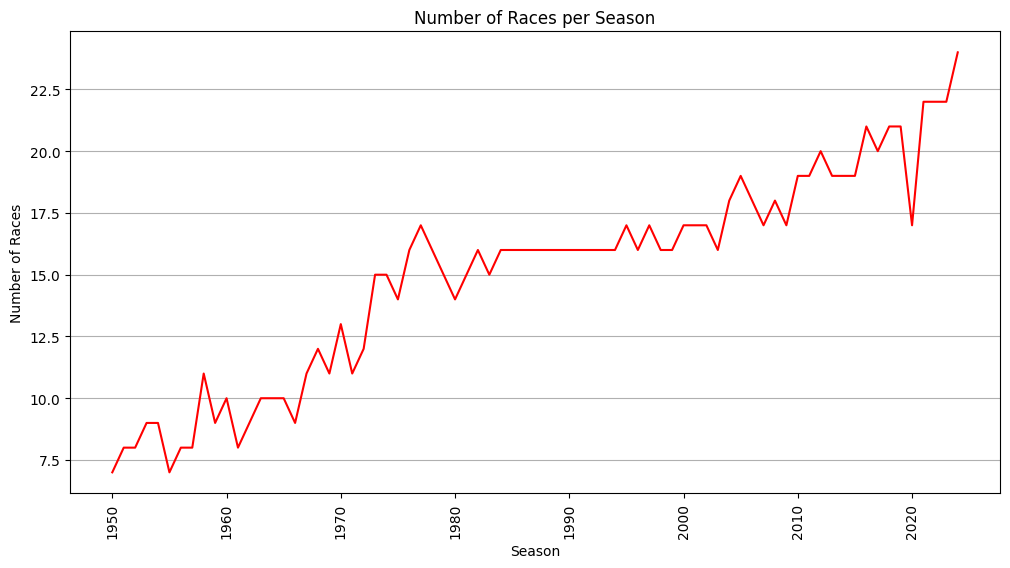

In [15]:
races_df=pd.read_csv("/content/races.csv")
races_per_season = races_df['year'].value_counts().reset_index()
races_per_season.columns = ['year', 'number_of_races']
races_per_season = races_per_season.sort_values(by='year')

plt.figure(figsize=(12, 6))
plt.plot(races_per_season['year'], races_per_season['number_of_races'], color='red')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races per Season')
plt.xticks(rotation=90)
plt.grid(axis='y')

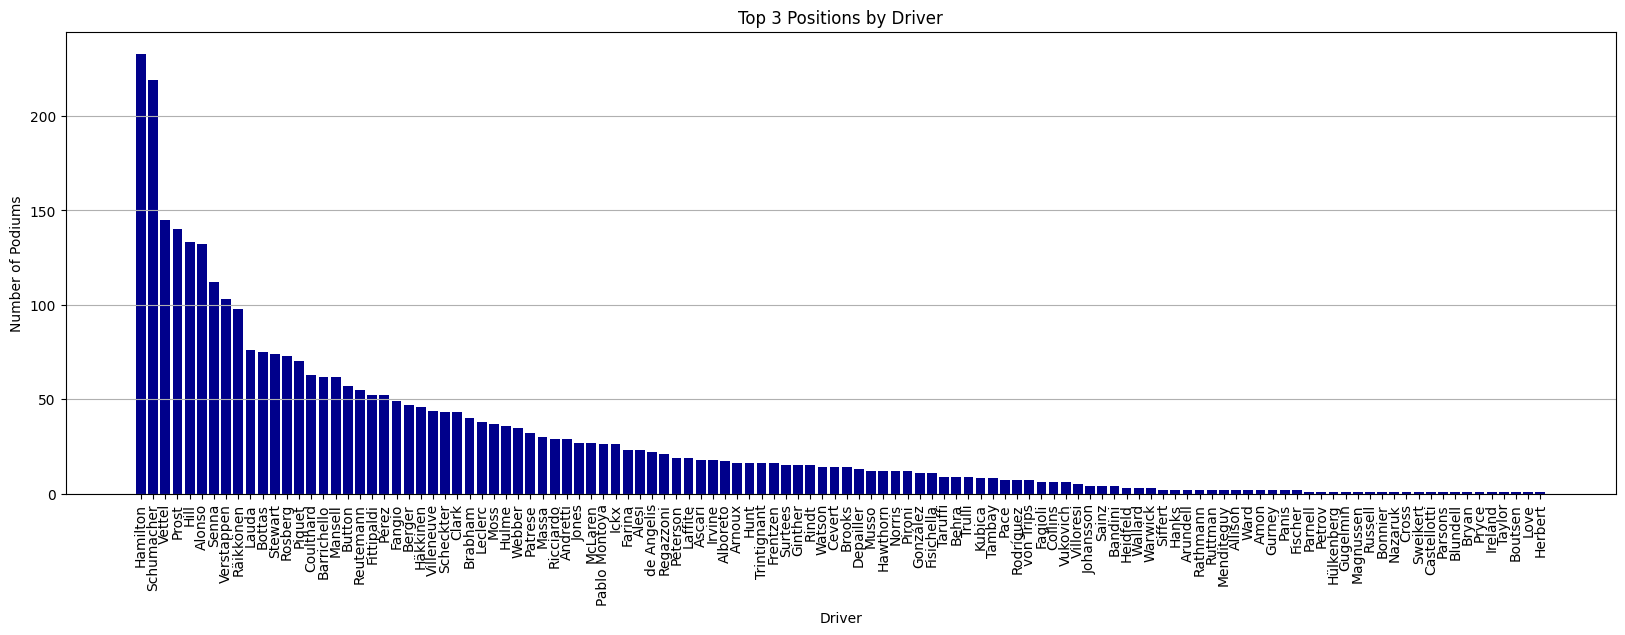

In [31]:
driver_standing_df = pd.read_csv("/content/driver_standings.csv")
driver_df = pd.read_csv("/content/drivers.csv")
merged_driver_standings = pd.merge(driver_standing_df, driver_df, on='driverId')

top_driver_standings = merged_driver_standings[merged_driver_standings['position'] <= 3]

top_driver_counts = top_driver_standings['surname'].value_counts().reset_index()
top_driver_counts.columns = ['driver', 'top_positions']

plt.figure(figsize=(20, 6))
plt.bar(top_driver_counts['driver'], top_driver_counts['top_positions'], color='darkblue')
plt.xlabel('Driver')
plt.ylabel('Number of Podiums')
plt.title('Top 3 Positions by Driver')
plt.xticks(rotation=90)
plt.grid(axis='y')

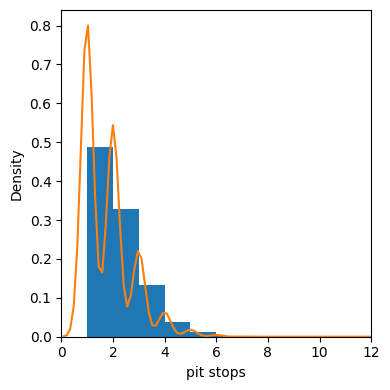

In [ ]:
ax = data['stop'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1,12), figsize=(4, 4))
data['stop'].plot.density(ax=ax)
ax.set_xlabel('pit stops')

plt.tight_layout()
plt.show()

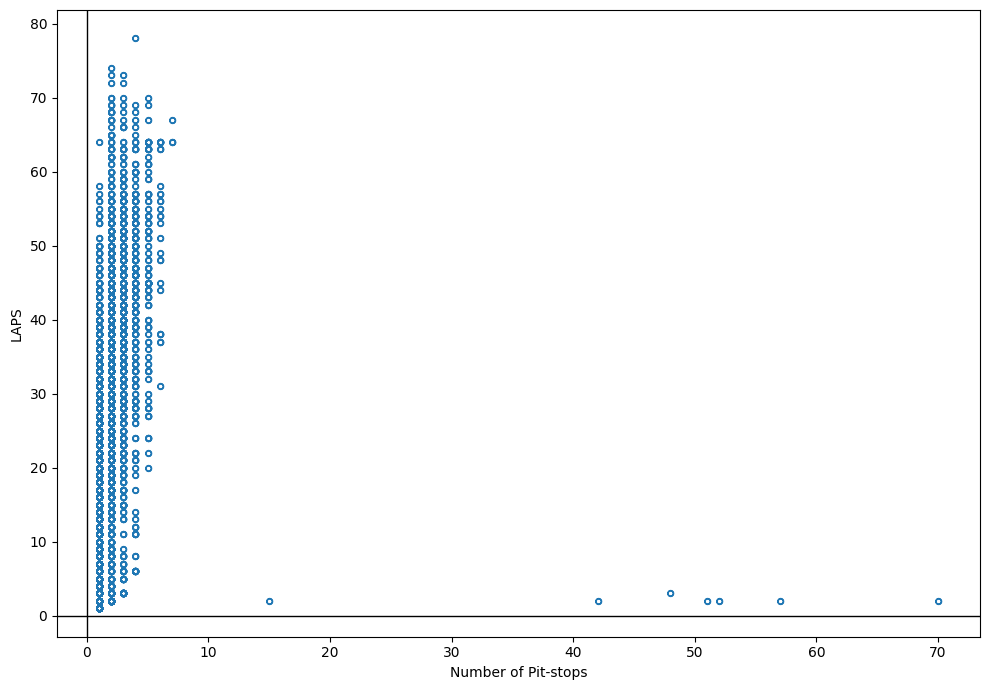

In [ ]:
ax = data.plot.scatter(x='stop', y='lap', figsize=(10, 7), marker='$\u25EF$')
ax.set_xlabel('Number of Pit-stops')
ax.set_ylabel('LAPS')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

plt.tight_layout()
plt.show()

In [ ]:

merge_constr = merge_constr.drop('url', axis=1)
print(merge_constr)

       constructorId constructorRef        name nationality  \
0                  1        mclaren     McLaren     British   
1                  1        mclaren     McLaren     British   
2                  1        mclaren     McLaren     British   
3                  1        mclaren     McLaren     British   
4                  1        mclaren     McLaren     British   
...              ...            ...         ...         ...   
13256            215             rb  RB F1 Team     Italian   
13257            215             rb  RB F1 Team     Italian   
13258            215             rb  RB F1 Team     Italian   
13259            215             rb  RB F1 Team     Italian   
13260            215             rb  RB F1 Team     Italian   

       constructorStandingsId  raceId  points  position positionText  wins  
0                           1      18    14.0         1            1     1  
1                           7      19    24.0         1            1     1  
2           

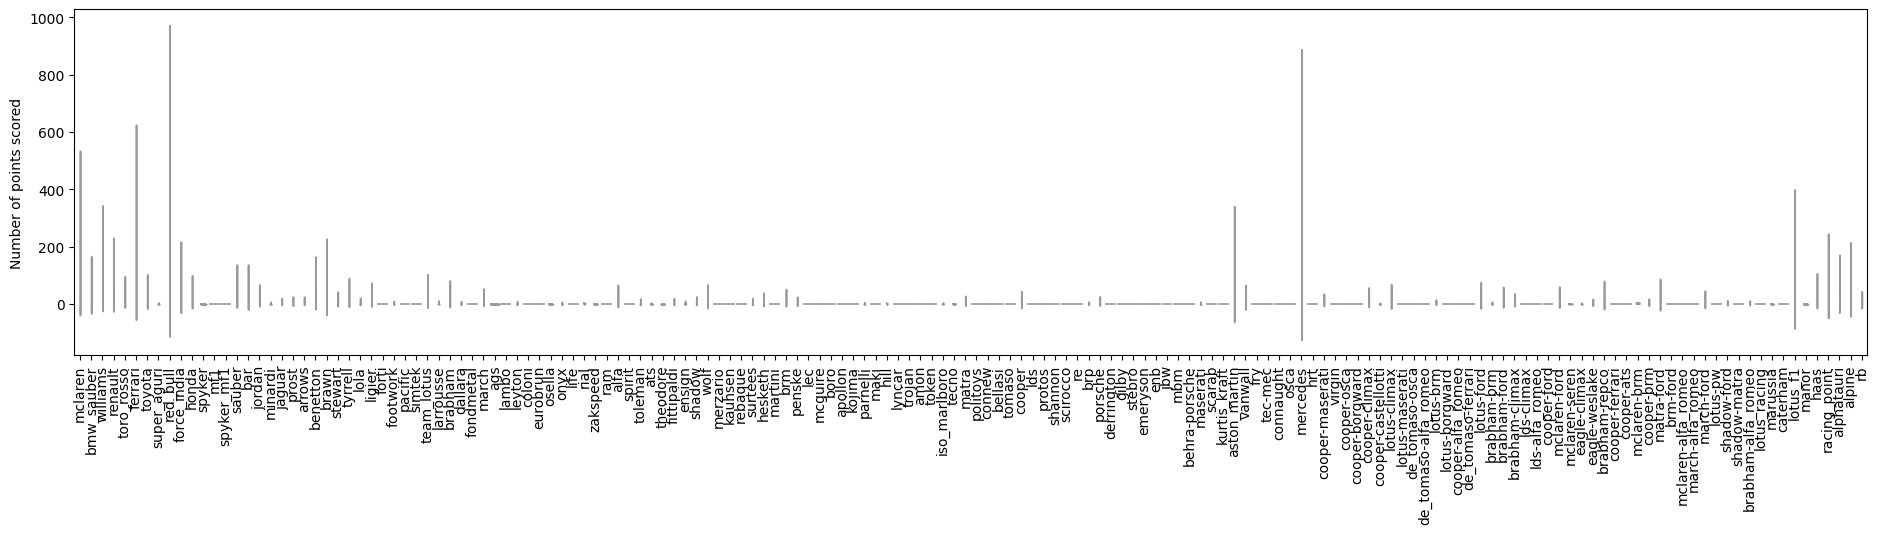

In [ ]:
fig, ax = plt.subplots(figsize=(19, 4))
sns.violinplot(data=merge_constr, x='constructorRef', y='points',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Number of points scored')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

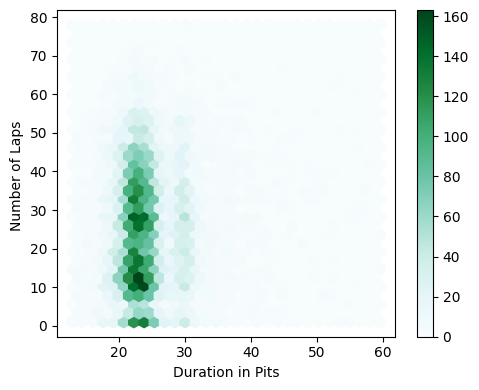

In [ ]:
data['duration'] = pd.to_numeric(df['duration'], errors='coerce')
ax = data.plot.hexbin(x='duration', y='lap',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Duration in Pits')
ax.set_ylabel('Number of Laps ')

plt.tight_layout()
plt.show()

In [ ]:
contingency_table = pd.crosstab(merge_constr['constructorRef'],merge_constr['nationality'])
print(contingency_table)

nationality     American  Australian  Austrian  Belgian  Brazilian  British  \
constructorRef                                                                
ags                    0           0         0        0          0        0   
alfa                   0           0         0        0          0        0   
alphatauri             0           0         0        0          0        0   
alpine                 0           0         0        0          0        0   
amon                   0           0         0        0          0        0   
...                  ...         ...       ...      ...        ...      ...   
vanwall                0           0         0        0          0       20   
virgin                 0           0         0        0          0       38   
williams               0           0         0        0          0      844   
wolf                   0           0         0        0          0        0   
zakspeed               0           0         0      

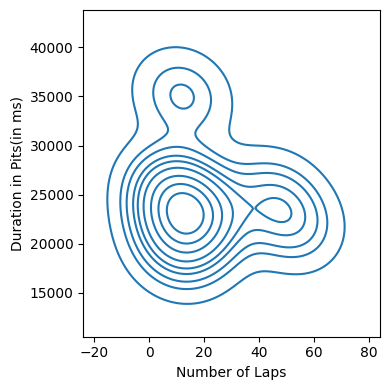

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(merge_driver.sample(10), x='lap', y='milliseconds', ax=ax)
ax.set_xlabel('Number of Laps')
ax.set_ylabel('Duration in Pits(in ms)')

plt.tight_layout()
plt.show()